In [93]:
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
# import matplotlib
import h5py
import matplotlib.pyplot as plt
import numpy as np
import random

In [94]:
with h5py.File(''.join(['bitcoin2015to2019_5m_256_16.h5']), 'r') as hf:
    datas = hf['inputs'].value
    labels = hf['outputs'].value
    input_times = hf['input_times'].value
    output_times = hf['output_times'].value
    original_inputs = hf['original_inputs'].value
    original_outputs = hf['original_outputs'].value
    original_datas = hf['original_datas'].value

In [95]:
scaler=MinMaxScaler()
#split training validation
training_size = int(0.8* datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,0]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

In [96]:

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true.shape

(322, 272, 1)

In [97]:
ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
ground_true_times.shape

(322, 272, 1)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
training_datas.shape, training_labels.shape

((1288, 256, 1), (1288, 16))

In [100]:
# predicted = np.zeros(validation_labels.shape)
# for i in range(16):
#     lr = LinearRegression()
#     lr.fit(training_datas[:,:,0], training_labels[:,i])
#     predicted[:,i] = lr.predict(validation_datas[:,:,0])
# predicted.shape

print(training_datas.shape)
print(training_datas[:,:,0].shape)

from keras.optimizers import Adam
from pyimagesearch import models
from keras.callbacks import ModelCheckpoint
# create our MLP and then compile the model using mean absolute
# percentage error as our loss, implying that we seek to minimize
# the absolute percentage difference between our price *predictions*
# and the *actual prices*
model = models.create_mlp(training_datas.shape[1], regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

model_path =  'models/best_model_{epoch:02d}-{val_loss:.4f}.hdf5'
mcp_save = ModelCheckpoint(filepath=model_path, save_best_only=True, monitor='val_loss', mode='min')
# train the model
print("[INFO] training model...")
model.fit(training_datas[:,:,0], training_labels, validation_data=(validation_datas[:,:,0] , validation_labels),
	epochs=1000, batch_size=4, callbacks = [mcp_save])




(1288, 256, 1)
(1288, 256)
[INFO] training model...
Train on 1288 samples, validate on 322 samples
Epoch 1/1000
1288/1288 [==============================] - 0s 343us/step - loss: 9.9793 - val_loss: 2.8769
Epoch 2/1000
1288/1288 [==============================] - 0s 175us/step - loss: 4.6056 - val_loss: 1.8196
Epoch 3/1000
1288/1288 [==============================] - 0s 188us/step - loss: 3.6175 - val_loss: 2.2496
Epoch 4/1000
1288/1288 [==============================] - 0s 180us/step - loss: 3.8273 - val_loss: 2.7373
Epoch 5/1000
1288/1288 [==============================] - 0s 199us/step - loss: 3.6328 - val_loss: 1.8717
Epoch 6/1000
1288/1288 [==============================] - 0s 199us/step - loss: 3.5508 - val_loss: 1.6846
Epoch 7/1000
1288/1288 [==============================] - 0s 232us/step - loss: 3.5348 - val_loss: 1.3191
Epoch 8/1000
1288/1288 [==============================] - 0s 287us/step - loss: 3.6058 - val_loss: 3.0495
Epoch 9/1000
1288/1288 [=============================

1288/1288 [==============================] - 0s 250us/step - loss: 2.5012 - val_loss: 2.5112
Epoch 77/1000
1288/1288 [==============================] - 0s 201us/step - loss: 2.1878 - val_loss: 1.2729
Epoch 78/1000
1288/1288 [==============================] - 0s 185us/step - loss: 2.1135 - val_loss: 1.5982
Epoch 79/1000
1288/1288 [==============================] - 0s 186us/step - loss: 2.2032 - val_loss: 1.5025
Epoch 80/1000
1288/1288 [==============================] - 0s 189us/step - loss: 2.5491 - val_loss: 1.1187
Epoch 81/1000
1288/1288 [==============================] - 0s 190us/step - loss: 2.4057 - val_loss: 1.1183
Epoch 82/1000
1288/1288 [==============================] - 0s 197us/step - loss: 2.0978 - val_loss: 1.2815
Epoch 83/1000
1288/1288 [==============================] - 0s 197us/step - loss: 2.2671 - val_loss: 2.1282
Epoch 84/1000
1288/1288 [==============================] - 0s 187us/step - loss: 2.1911 - val_loss: 0.9876
Epoch 85/1000
1288/1288 [==========================

1288/1288 [==============================] - 0s 222us/step - loss: 1.9480 - val_loss: 0.9525
Epoch 153/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.9044 - val_loss: 0.9120
Epoch 154/1000
1288/1288 [==============================] - 0s 184us/step - loss: 1.8502 - val_loss: 1.6866
Epoch 155/1000
1288/1288 [==============================] - 0s 191us/step - loss: 1.8793 - val_loss: 0.7379
Epoch 156/1000
1288/1288 [==============================] - 0s 214us/step - loss: 2.0377 - val_loss: 1.0912
Epoch 157/1000
1288/1288 [==============================] - 0s 217us/step - loss: 2.0764 - val_loss: 0.8136
Epoch 158/1000
1288/1288 [==============================] - 0s 187us/step - loss: 2.0851 - val_loss: 1.0778
Epoch 159/1000
1288/1288 [==============================] - 0s 189us/step - loss: 1.9080 - val_loss: 1.0416
Epoch 160/1000
1288/1288 [==============================] - 0s 189us/step - loss: 1.8747 - val_loss: 0.6829
Epoch 161/1000
1288/1288 [=================

Epoch 228/1000
1288/1288 [==============================] - 0s 253us/step - loss: 1.8210 - val_loss: 0.5850
Epoch 229/1000
1288/1288 [==============================] - 0s 209us/step - loss: 1.7048 - val_loss: 1.2541
Epoch 230/1000
1288/1288 [==============================] - 0s 155us/step - loss: 1.6916 - val_loss: 0.9085
Epoch 231/1000
1288/1288 [==============================] - 0s 192us/step - loss: 1.7472 - val_loss: 1.4298
Epoch 232/1000
1288/1288 [==============================] - 0s 225us/step - loss: 1.7578 - val_loss: 0.9340
Epoch 233/1000
1288/1288 [==============================] - 0s 208us/step - loss: 1.9326 - val_loss: 0.5912
Epoch 234/1000
1288/1288 [==============================] - 0s 214us/step - loss: 1.6703 - val_loss: 1.6567
Epoch 235/1000
1288/1288 [==============================] - 0s 204us/step - loss: 1.7787 - val_loss: 0.9126
Epoch 236/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.6482 - val_loss: 0.9545
Epoch 237/1000
1288/1288 [==

Epoch 304/1000
1288/1288 [==============================] - 0s 198us/step - loss: 1.6398 - val_loss: 0.7879
Epoch 305/1000
1288/1288 [==============================] - 0s 193us/step - loss: 1.5264 - val_loss: 0.6751
Epoch 306/1000
1288/1288 [==============================] - 0s 227us/step - loss: 1.5634 - val_loss: 0.5649
Epoch 307/1000
1288/1288 [==============================] - 0s 208us/step - loss: 1.6333 - val_loss: 0.6143
Epoch 308/1000
1288/1288 [==============================] - 0s 220us/step - loss: 1.8036 - val_loss: 0.8856
Epoch 309/1000
1288/1288 [==============================] - 0s 209us/step - loss: 1.6250 - val_loss: 0.7273
Epoch 310/1000
1288/1288 [==============================] - 0s 201us/step - loss: 1.7338 - val_loss: 0.6453
Epoch 311/1000
1288/1288 [==============================] - 0s 196us/step - loss: 1.7235 - val_loss: 0.6345
Epoch 312/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.6566 - val_loss: 1.6055
Epoch 313/1000
1288/1288 [==

Epoch 380/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.7219 - val_loss: 1.2573
Epoch 381/1000
1288/1288 [==============================] - 0s 251us/step - loss: 1.5433 - val_loss: 0.9958
Epoch 382/1000
1288/1288 [==============================] - 0s 233us/step - loss: 1.4839 - val_loss: 0.5456
Epoch 383/1000
1288/1288 [==============================] - 0s 212us/step - loss: 1.4681 - val_loss: 1.2758
Epoch 384/1000
1288/1288 [==============================] - 0s 307us/step - loss: 1.5627 - val_loss: 0.6409
Epoch 385/1000
1288/1288 [==============================] - 0s 235us/step - loss: 1.5298 - val_loss: 0.4919
Epoch 386/1000
1288/1288 [==============================] - 0s 183us/step - loss: 1.5149 - val_loss: 0.6442
Epoch 387/1000
1288/1288 [==============================] - 0s 224us/step - loss: 1.4821 - val_loss: 1.1177
Epoch 388/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.4855 - val_loss: 1.0630
Epoch 389/1000
1288/1288 [==

Epoch 456/1000
1288/1288 [==============================] - 0s 242us/step - loss: 1.4863 - val_loss: 0.6035
Epoch 457/1000
1288/1288 [==============================] - 0s 225us/step - loss: 1.6389 - val_loss: 0.6035
Epoch 458/1000
1288/1288 [==============================] - 0s 248us/step - loss: 1.5778 - val_loss: 0.3993
Epoch 459/1000
1288/1288 [==============================] - 0s 240us/step - loss: 1.4704 - val_loss: 0.6230
Epoch 460/1000
1288/1288 [==============================] - 0s 219us/step - loss: 1.4889 - val_loss: 0.6344
Epoch 461/1000
1288/1288 [==============================] - 0s 199us/step - loss: 1.4516 - val_loss: 0.5953
Epoch 462/1000
1288/1288 [==============================] - 0s 268us/step - loss: 1.4566 - val_loss: 0.9948
Epoch 463/1000
1288/1288 [==============================] - 0s 243us/step - loss: 1.4021 - val_loss: 0.7821
Epoch 464/1000
1288/1288 [==============================] - 0s 184us/step - loss: 1.5267 - val_loss: 0.8528
Epoch 465/1000
1288/1288 [==

Epoch 532/1000
1288/1288 [==============================] - 0s 223us/step - loss: 1.2830 - val_loss: 0.5926
Epoch 533/1000
1288/1288 [==============================] - 0s 220us/step - loss: 1.3872 - val_loss: 1.3230
Epoch 534/1000
1288/1288 [==============================] - 0s 230us/step - loss: 1.4471 - val_loss: 0.5114
Epoch 535/1000
1288/1288 [==============================] - 0s 211us/step - loss: 1.2926 - val_loss: 0.9087
Epoch 536/1000
1288/1288 [==============================] - 0s 178us/step - loss: 1.2674 - val_loss: 0.8476
Epoch 537/1000
1288/1288 [==============================] - 0s 217us/step - loss: 1.4443 - val_loss: 0.6806
Epoch 538/1000
1288/1288 [==============================] - 0s 204us/step - loss: 1.2224 - val_loss: 0.6114
Epoch 539/1000
1288/1288 [==============================] - 0s 242us/step - loss: 1.4273 - val_loss: 0.4382
Epoch 540/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.4029 - val_loss: 0.4369
Epoch 541/1000
1288/1288 [==

Epoch 608/1000
1288/1288 [==============================] - 0s 238us/step - loss: 1.3860 - val_loss: 0.4555
Epoch 609/1000
1288/1288 [==============================] - 0s 198us/step - loss: 1.3934 - val_loss: 1.5572
Epoch 610/1000
1288/1288 [==============================] - 0s 214us/step - loss: 1.3718 - val_loss: 0.4649
Epoch 611/1000
1288/1288 [==============================] - 0s 209us/step - loss: 1.3522 - val_loss: 0.8416
Epoch 612/1000
1288/1288 [==============================] - 0s 222us/step - loss: 1.3292 - val_loss: 0.9436
Epoch 613/1000
1288/1288 [==============================] - 0s 276us/step - loss: 1.3900 - val_loss: 0.6987
Epoch 614/1000
1288/1288 [==============================] - 0s 283us/step - loss: 1.3891 - val_loss: 0.9566
Epoch 615/1000
1288/1288 [==============================] - 0s 286us/step - loss: 1.4163 - val_loss: 0.4737
Epoch 616/1000
1288/1288 [==============================] - 0s 238us/step - loss: 1.3385 - val_loss: 0.9165
Epoch 617/1000
1288/1288 [==

Epoch 684/1000
1288/1288 [==============================] - 0s 204us/step - loss: 1.3119 - val_loss: 0.6687
Epoch 685/1000
1288/1288 [==============================] - 0s 286us/step - loss: 1.3378 - val_loss: 0.6718
Epoch 686/1000
1288/1288 [==============================] - 0s 231us/step - loss: 1.3871 - val_loss: 0.8744
Epoch 687/1000
1288/1288 [==============================] - 0s 294us/step - loss: 1.3366 - val_loss: 0.6435
Epoch 688/1000
1288/1288 [==============================] - 0s 319us/step - loss: 1.2837 - val_loss: 0.6481
Epoch 689/1000
1288/1288 [==============================] - 0s 292us/step - loss: 1.3850 - val_loss: 0.8623
Epoch 690/1000
1288/1288 [==============================] - 0s 230us/step - loss: 1.2818 - val_loss: 0.5799
Epoch 691/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.2909 - val_loss: 0.3698
Epoch 692/1000
1288/1288 [==============================] - 0s 235us/step - loss: 1.2578 - val_loss: 0.4429
Epoch 693/1000
1288/1288 [==

Epoch 760/1000
1288/1288 [==============================] - 0s 209us/step - loss: 1.2780 - val_loss: 0.4395
Epoch 761/1000
1288/1288 [==============================] - 0s 208us/step - loss: 1.1974 - val_loss: 0.6263
Epoch 762/1000
1288/1288 [==============================] - 0s 199us/step - loss: 1.2418 - val_loss: 0.4335
Epoch 763/1000
1288/1288 [==============================] - 0s 193us/step - loss: 1.2799 - val_loss: 0.4222
Epoch 764/1000
1288/1288 [==============================] - 0s 199us/step - loss: 1.2918 - val_loss: 0.5731
Epoch 765/1000
1288/1288 [==============================] - 0s 197us/step - loss: 1.2504 - val_loss: 0.4008
Epoch 766/1000
1288/1288 [==============================] - 0s 199us/step - loss: 1.2483 - val_loss: 0.4403
Epoch 767/1000
1288/1288 [==============================] - 0s 203us/step - loss: 1.2185 - val_loss: 0.5233
Epoch 768/1000
1288/1288 [==============================] - 0s 208us/step - loss: 1.1649 - val_loss: 2.2379
Epoch 769/1000
1288/1288 [==

Epoch 836/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.2014 - val_loss: 0.4121
Epoch 837/1000
1288/1288 [==============================] - 0s 206us/step - loss: 1.1609 - val_loss: 0.4002
Epoch 838/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.3637 - val_loss: 0.6809
Epoch 839/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.1703 - val_loss: 0.4479
Epoch 840/1000
1288/1288 [==============================] - 0s 203us/step - loss: 1.2042 - val_loss: 0.4429
Epoch 841/1000
1288/1288 [==============================] - 0s 192us/step - loss: 1.1235 - val_loss: 0.5311
Epoch 842/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.1630 - val_loss: 0.3947
Epoch 843/1000
1288/1288 [==============================] - 0s 200us/step - loss: 1.1906 - val_loss: 0.4734
Epoch 844/1000
1288/1288 [==============================] - 0s 197us/step - loss: 1.2212 - val_loss: 0.4083
Epoch 845/1000
1288/1288 [==

Epoch 912/1000
1288/1288 [==============================] - 0s 225us/step - loss: 1.2072 - val_loss: 0.4239
Epoch 913/1000
1288/1288 [==============================] - 0s 190us/step - loss: 1.2028 - val_loss: 0.8968
Epoch 914/1000
1288/1288 [==============================] - 0s 214us/step - loss: 1.1830 - val_loss: 0.3726
Epoch 915/1000
1288/1288 [==============================] - 0s 245us/step - loss: 1.2658 - val_loss: 1.0354
Epoch 916/1000
1288/1288 [==============================] - 0s 237us/step - loss: 1.2328 - val_loss: 0.7631
Epoch 917/1000
1288/1288 [==============================] - 0s 240us/step - loss: 1.2770 - val_loss: 0.4112
Epoch 918/1000
1288/1288 [==============================] - 0s 199us/step - loss: 1.2077 - val_loss: 0.5399
Epoch 919/1000
1288/1288 [==============================] - 0s 202us/step - loss: 1.2550 - val_loss: 0.3524
Epoch 920/1000
1288/1288 [==============================] - 0s 214us/step - loss: 1.2320 - val_loss: 0.5843
Epoch 921/1000
1288/1288 [==

Epoch 988/1000
1288/1288 [==============================] - 0s 196us/step - loss: 1.1955 - val_loss: 0.4092
Epoch 989/1000
1288/1288 [==============================] - 0s 246us/step - loss: 1.1919 - val_loss: 0.4800
Epoch 990/1000
1288/1288 [==============================] - 0s 239us/step - loss: 1.2334 - val_loss: 0.4688
Epoch 991/1000
1288/1288 [==============================] - 0s 276us/step - loss: 1.2302 - val_loss: 0.4018
Epoch 992/1000
1288/1288 [==============================] - 0s 232us/step - loss: 1.3105 - val_loss: 0.8545
Epoch 993/1000
1288/1288 [==============================] - 0s 187us/step - loss: 1.1219 - val_loss: 0.3771
Epoch 994/1000
1288/1288 [==============================] - 0s 204us/step - loss: 1.2025 - val_loss: 0.4392
Epoch 995/1000
1288/1288 [==============================] - 0s 198us/step - loss: 1.3016 - val_loss: 0.5161
Epoch 996/1000
1288/1288 [==============================] - 0s 204us/step - loss: 1.2628 - val_loss: 0.4991
Epoch 997/1000
1288/1288 [==

In [101]:
model.load_weights('models/best_model_983-0.3451.hdf5')

preds = model.predict(validation_datas[:,:,0])

print(preds.shape)

predicted_inverted = []

scaler.fit(original_datas[:,0].reshape(-1,1))
predicted_inverted.append(scaler.inverse_transform(preds))
print (np.array(predicted_inverted).shape)
#get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print (np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')







ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.set_index('times').reset_index()
ground_true_df.shape

ground_true_df = ground_true_df.drop_duplicates(['times'])

(322, 16)
(1, 322, 16)
(5152,)


In [102]:

prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(5152, 2)

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_original_outputs[:,:,0].reshape(-1),predicted_inverted))
plt_name = 'results/bitcoin2015to2019_close_5m_256_16_MLP'


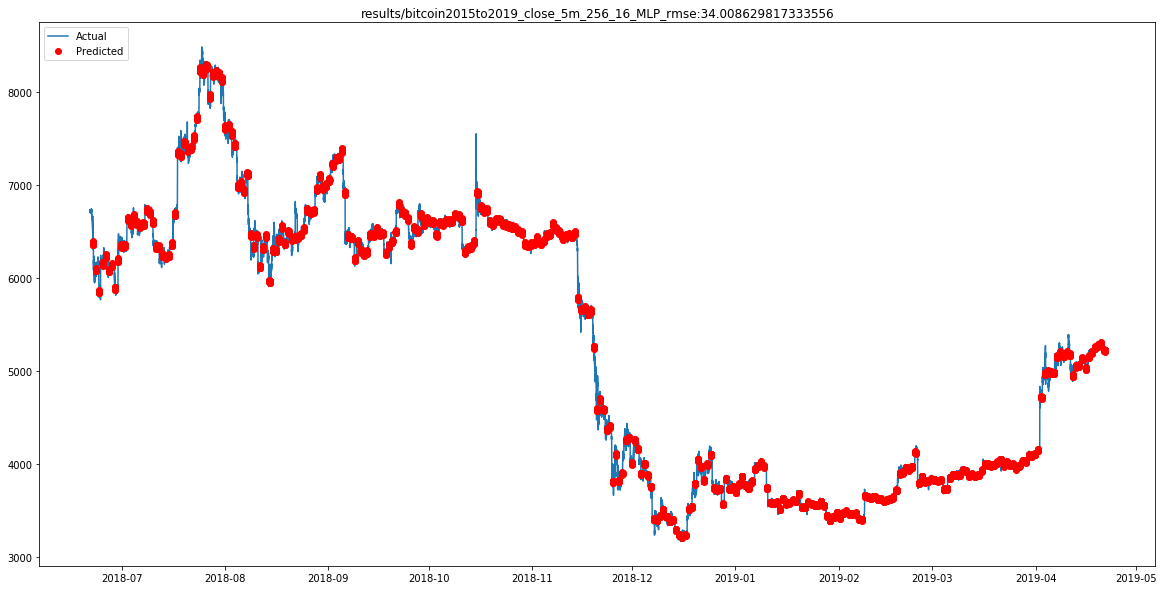

In [104]:
plt.figure(figsize=(20,10))
plt.plot(ground_true_df.times,ground_true_df.value, label = 'Actual')
# plt.plot(prediction_df.times,prediction_df.value, label = 'Predicted')
plt.plot(prediction_df.times,prediction_df.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.title(plt_name + '_rmse:' + str(rmse))
plt.savefig(plt_name + '.png')
plt.show()